On branch main

No commits yet

nothing to commit (create/copy files and use "git add" to track)
fatal: your current branch 'main' does not have any commits yet
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/MilaPost/Statistic_python.git'


In [ ]:
import numpy as np
import scipy.stats as st
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd

**Задание № 1**
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.

In [ ]:
def check_normality(data):
    # Проведение теста Шапиро-Уилка
    stat, p = shapiro(data)
    print(f"Статистика теста: {stat:.3f}, p-значение: {p:.3f}")
    if p < 0.05: # условие статистической значимости
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

In [ ]:
data = np.random.normal(loc=0, scale=1, size=100)
check_normality(data)

Статистика теста: 0.988, p-значение: 0.510
Не отклоняем нулевую гипотезу >> Данные распределены нормально


**Задание № 2**
Даны две выборки роста мужчин и женщин.

Докажите, используя t-Тест Стьдента, что различие между выборками незначительно, если уровень значимости равен  α  = 0.001.
Покажите различия визуально
Является ли результат полезным с практической точки зрения? Почему да или нет?

In [ ]:
np.random.seed(42) #фиксация случайности

mens  = st.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = st.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170
stat, p = st.ttest_ind(mens, womens)
print(f"Статистика = {stat:.3f}, p = {p:.5f}")
# Проверка уровня значимости (α = 0.001)
if p < 0.001:
    print("Отклоняем нулевую гипотезу, рост мужчин статистически отличается от роста женщин.")
else:
    print("Не отклоняем нулевую гипотезу, различие роста мужчин и женщин статистически незначительно.")

Статистика = 28.314, p = 0.00000
Отклоняем нулевую гипотезу, рост мужчин статистически отличается от роста женщин.


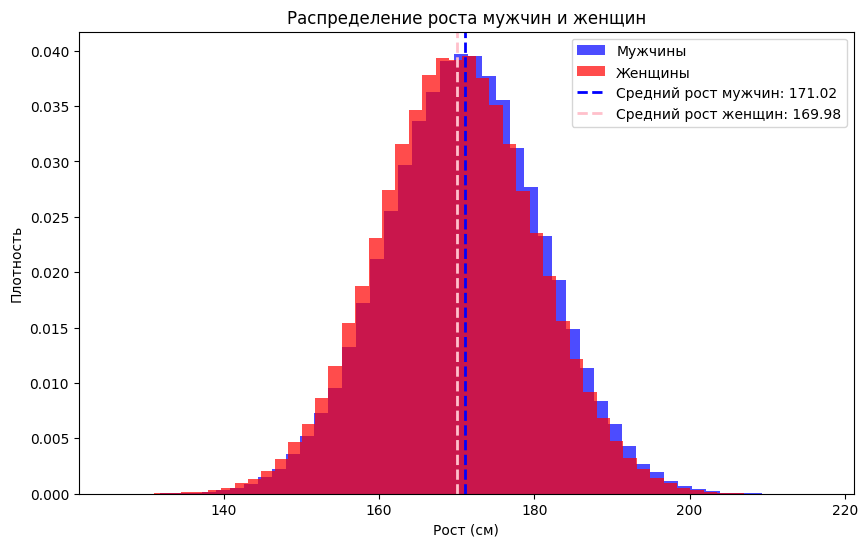

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(mens, bins=50, alpha=0.7, label='Мужчины', color='blue', density=True)
plt.hist(womens, bins=50, alpha=0.7, label='Женщины', color='red', density=True)
plt.axvline(mens.mean(), color='blue', linestyle='dashed', linewidth=2, label=f"Средний рост мужчин: {mens.mean():.2f}")
plt.axvline(womens.mean(), color='pink', linestyle='dashed', linewidth=2, label=f"Средний рост женщин: {womens.mean():.2f}")
plt.title("Распределение роста мужчин и женщин")
plt.xlabel("Рост (см)")
plt.ylabel("Плотность")
plt.legend()
plt.show()

Вывод: При заданном уровне значимости рост мужчин статистически отличается от роста женщин, но такой уровень значимости минимален и для роста, обычно, не применим. Он больше подходит для финансовой сферы или для медицинских исследований.

**Задание № 3**
Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.

In [ ]:
test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]
#для начала проверим нормальность обоих распределений
stat_test, p_test = st.shapiro(test_team)
stat_dev, p_dev = st.shapiro(developer_team)
if p_test < 0.05:
    print("Test Team: распределение не является нормальным.")
else:
    print("Test Team: распределение нормально.")

if p_dev < 0.05:
    print("Developer Team: распределение не является нормальным.")
else:
    print("Developer Team: распределение нормально.")


Test Team: распределение не является нормальным.
Developer Team: распределение не является нормальным.


In [ ]:
#Т.к. распределение обеих выборок не является нормальным, используем тест Манна-Уитни
stat, p = st.mannwhitneyu(test_team, developer_team)

print(f"Статистика = {stat:.3f}, p = {p:.3f}")
# Вывод результата
if p < 0.05:
    print("Отклоняем нулевую гипотезу: есть статистически значимая разница в сверхурочных часах между командами.")
else:
    print("Не отклоняем нулевую гипотезу: статистически значимой разницы в сверхурочных часах нет.")

Статистика = 151.500, p = 0.823
Не отклоняем нулевую гипотезу: статистически значимой разницы в сверхурочных часах нет.


**Задание № 4**
Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.

In [ ]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1];
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9];
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3];
alpha = 0.05
#для каждого массива данных проверяем нормальность распределения
for group, name in zip([only_breast, only_formula, both], ['Only Breast', 'Only Formula', 'Both']):
    stat, p = st.shapiro(group)
    print(f"{name}: W = {stat:.3f}, p = {p:.3f}")
    if p < alpha:
        print(f"{name}: распределение не является нормальным.")
    else:
        print(f"{name}: распределение нормально.")
    print()

Only Breast: W = 0.951, p = 0.469
Only Breast: распределение нормально.

Only Formula: W = 0.976, p = 0.888
Only Formula: распределение нормально.

Both: W = 0.975, p = 0.797
Both: распределение нормально.



In [ ]:
levene_stat, levene_p = st.levene(only_breast, only_formula, both)
print(f"Levene Test: Statistic = {levene_stat:.3f}, p = {levene_p:.3f}")

Levene Test: Statistic = 0.266, p = 0.767


In [ ]:
#данные нормальны и дисперсии равны → используем однофакторный ANOVA.
stat, p = st.f_oneway(only_breast, only_formula, both)
print(f"F-статистика = {stat:.3f}, p-значение = {p:.3f}")

if p < 0.05:
    print("Отклоняем нулевую гипотезу: есть значимые различия между группами.")
else:
    print("Не отклоняем нулевую гипотезу: различий между группами нет.")


F-статистика = 26.701, p-значение = 0.000
Отклоняем нулевую гипотезу: есть значимые различия между группами.


In [ ]:
# Значения различимы, проводим тест Тьюки
if p < alpha:
    print("\nВыполняем тест Тьюки для выявления различий:")
    data = only_breast + only_formula + both
    groups = (['Only Breast'] * len(only_breast) +
                  ['Only Formula'] * len(only_formula) +
                  ['Both'] * len(both))
    tukey = pairwise_tukeyhsd(endog=data, groups=groups, alpha=alpha)
    print(tukey)


Выполняем тест Тьюки для выявления различий:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2    meandiff p-adj    lower    upper   reject
------------------------------------------------------------------
       Both  Only Breast -60.1286 0.0995 -129.1485   8.8912  False
       Both Only Formula 149.2636    0.0   82.3651 216.1621   True
Only Breast Only Formula 209.3923    0.0  137.3508 281.4337   True
------------------------------------------------------------------


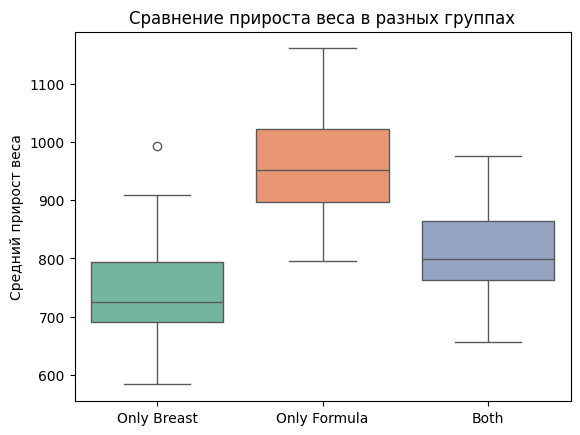

In [ ]:
#Визуализируем данные
sns.boxplot(data=[only_breast, only_formula, both], palette="Set2")
plt.xticks([0, 1, 2], ['Only Breast', 'Only Formula', 'Both'])
plt.title('Сравнение прироста веса в разных группах')
plt.ylabel('Средний прирост веса')
plt.show()

Вывод: установлена значительная разница в среднемесячной прибавке веса у групп (Only_breast и Only_formula) и групп (Both и Only_formula). Соответственно наибольшая прибавка веса идет у групп Only_formula и Both.